<aside>
💡 Question-1

You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

Input:

        10

       /   \

     2      7

   /   \

 8      4

Output:

        8

      /   \

    4     10

  /   \

2      7

</aside>

In [2]:
# A binary tree node
class Node:
     
    # Constructor to create a new node
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
 
# Helper function to store the inorder traversal of a tree
def storeInorder(root, inorder):
     
    # Base Case
    if root is None:
        return
     
    # First store the left subtree
    storeInorder(root.left, inorder)
     
    # Copy the root's data
    inorder.append(root.data)
 
    # Finally store the right subtree
    storeInorder(root.right, inorder)
 
# A helper function to count nodes in a binary tree
def countNodes(root):
    if root is None:
        return 0
 
    return countNodes(root.left) + countNodes(root.right) + 1
 
# Helper function that copies contents of sorted array
# to Binary tree
def arrayToBST(arr, root):
 
    # Base Case
    if root is None:
        return
     
    # First update the left subtree
    arrayToBST(arr, root.left)
 
    # now update root's data delete the value from array
    root.data = arr[0]
    arr.pop(0)
 
    # Finally update the right subtree
    arrayToBST(arr, root.right)
 
# This function converts a given binary tree to BST
def binaryTreeToBST(root):
     
    # Base Case: Tree is empty
    if root is None:
        return
     
    # Count the number of nodes in Binary Tree so that
    # we know the size of temporary array to be created
    n = countNodes(root)
 
    # Create the temp array and store the inorder traversal
    # of tree
    arr = []
    storeInorder(root, arr)
     
    # Sort the array
    arr.sort()
 
    # copy array elements back to binary tree
    arrayToBST(arr, root)
 
# Print the inorder traversal of the tree
def printInorder(root):
    if root is None:
        return
    printInorder(root.left)
    print (root.data,end=" ")
    printInorder(root.right)
 
# Driver program to test above function
root = Node(10)
root.left = Node(30)
root.right = Node(15)
root.left.left = Node(20)
root.right.right = Node(5)
 
# Convert binary tree to BST
binaryTreeToBST(root)
 
print ("The inorder traversal of the converted BST")
printInorder(root)

# tc = O(nlog n)
# sc = O(n)

The inorder traversal of the converted BST
5 10 15 20 30 

<aside>
💡 Question-2:

Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

Example:

Consider the following BST:
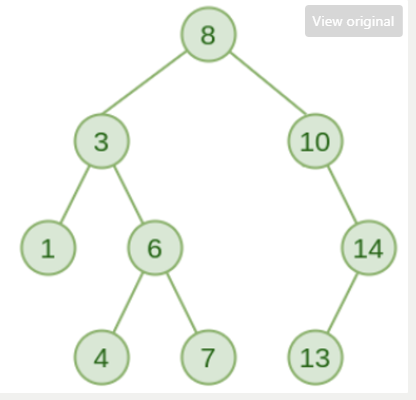

**Input-1:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 6

node-2 = 14

**Output-1:**

The distance between the two keys = 4

**Input-2:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 3

node-2 = 4

**Output-2:**

The distance between the two keys = 2

</aside>

In [5]:
class newNode:
 
    # Constructor to create a new node
    def __init__(self, data):
        self.key = data
        self.left = None
        self.right = None
 
# Standard BST insert function
def insert(root, key):
    if root == None:
        root = newNode(key)
    elif root.key > key:
        root.left = insert(root.left, key)
    elif root.key < key:
        root.right = insert(root.right, key)
    return root
 
# This function returns distance of x from
# root. This function assumes that x exists
# in BST and BST is not NULL.
def distanceFromRoot(root, x):
    if root.key == x:
        return 0
    elif root.key > x:
        return 1 + distanceFromRoot(root.left, x)
    return 1 + distanceFromRoot(root.right, x)
 
# Returns minimum distance between a and b.
# This function assumes that a and b exist
# in BST.
def distanceBetween2(root, a, b):
    if root == None:
        return 0
 
    # Both keys lie in left
    if root.key > a and root.key > b:
        return distanceBetween2(root.left, a, b)
 
    # Both keys lie in right
    if root.key < a and root.key < b: # same path
        return distanceBetween2(root.right, a, b)
 
    # Lie in opposite directions
    # (Root is LCA of two nodes)
    if root.key >= a and root.key <= b:
        return (distanceFromRoot(root, a) +
                distanceFromRoot(root, b))
 
# This function make sure that a is smaller
# than b before making a call to findDistWrapper()
def findDistWrapper(root, a, b):
    if a > b:
        a, b = b, a
    return distanceBetween2(root, a, b)
 
# Driver code
if __name__ == '__main__':
    root = None
    root = insert(root, 20)
    insert(root, 10)
    insert(root, 5)
    insert(root, 15)
    insert(root, 30)
    insert(root, 25)
    insert(root, 35)
    a, b = 5, 55
    print(findDistWrapper(root, 5, 35))

    # tc = O(h)  h is height of binary tree
    # sc  = O(h) recursive stack size h

4


<aside>
💡 Question-3:

Write a program to convert a binary tree to a doubly linked list.

Input:

        10

       /   \

     5     20

           /   \

        30     35

Output:

5 10 30 20 35

</aside>

In [7]:
class Node:
    def __init__(self, val):
        self.right = None
        self.data = val
        self.left = None
  
# Global variable used in convert
# prev = None

def BinaryTree2DoubleLinkedList(root):
    s = []
    s.append([root, 0])
    # res = []
    flag = True
    head = None
    prev = None
    while len(s) > 0:
        x = s.pop()
        t = x[0]
        state = x[1]
        if state == 3 or t == None: 
            continue
        s.append([t, state+1])
        if state == 0: 
            s.append([t.left, 0])
        elif state == 1: 
            if prev != None: prev.right = t
            t.left = prev 
            prev = t 
  
            if flag:  
                head = t 
                flag = False  
  
        elif state == 2: 
            s.append([t.right, 0])
  
    return head

def print_dll(head):
    
# Function to print nodes in given
# doubly linked list
    while head is not None:
        print(head.data, end=" ")
        head = head.right

if __name__ == '__main__':
    root = Node(10)
    root.left = Node(12)
    root.right = Node(15)
    root.left.left = Node(25)
    root.left.right = Node(30)
    root.right.left = Node(36)
      
    head = BinaryTree2DoubleLinkedList(root)
      
    # Print the converted list
    print_dll(head) 
    



25 12 30 10 36 15 

<aside>
💡 Question-4:

Write a program to connect nodes at the same level.

Input:

        1

      /   \

    2      3

  /   \   /   \

4     5 6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1

</aside>

In [13]:
class newnode:
    def __init__(self, data):
        self.data = data
        self.left = self.right = self.nextRight = None
 
#   setting right pointer to next right node
 
def connect(root):
 
    # Base condition
    if root is None:
        return
 
    # Create an empty queue like level order traversal
    queue = []
    queue.append(root)
    while len(queue) != 0:
 
        # size indicates no. of nodes at current level
        size = len(queue)
 
        # for keeping track of previous node
        prev = newnode(None)
        for i in range(size):
            temp = queue.pop(0)
            if temp.left:
                queue.append(temp.left)
            if temp.right:
                queue.append(temp.right)
            if prev != None:
                prev.nextRight = temp
                prev = temp
        prev.nextRight = None
 
 
# Driver Code
if __name__ == '__main__':
 
    # Constructed binary tree is

    root = newnode(10)
    root.left = newnode(8)
    root.right = newnode(2)
    root.left.left = newnode(3)
 
    # Populates nextRight pointer in all nodes
    connect(root)
 
    # Let us check the values of nextRight pointers
    print("nextRight of", root.data, "is ", end="")
    if root.nextRight:
        print(root.nextRight.data)
    else:
        print(-1)
    print("nextRight of", root.left.data, "is ", end="")
    if root.left.nextRight:
        print(root.left.nextRight.data)
    else:
        print(-1)
    print("nextRight of", root.right.data, "is ", end="")
    if root.right.nextRight:
        print(root.right.nextRight.data)
    else:
        print(-1)
    print("nextRight of", root.left.left.data, "is ", end="")
    if root.left.left.nextRight:
        print(root.left.left.nextRight.data)
    else:
        print(-1)
 

nextRight of 10 is -1
nextRight of 8 is 2
nextRight of 2 is -1
nextRight of 3 is -1
